In [29]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
import pickle
import torch
import cv2
import gc

data_dir = '../../data'
png_dir = os.path.join(data_dir, 'png_folder')

d = pickle.load(open(os.path.join(data_dir, 'd.pkl'), 'rb'))

train_df = pd.read_csv(os.path.join(data_dir, 'train_df.csv'))
train_df['psid'] = train_df['patient_id'].astype(str) + '_' + train_df['series_id'].astype(str)
train_df

,patient_id,series_id,aortic_hu,incomplete_organ,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,...,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,fold,png_suffix,dcm_folder,psid
0,10005,18667,187.0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,4,/home/superrich/programming/kaggle/rsna-abdomi...,/home/superrich/programming/kaggle/rsna-abdomi...,10005_18667
1,10007,47578,329.0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,/home/superrich/programming/kaggle/rsna-abdomi...,/home/superrich/programming/kaggle/rsna-abdomi...,10007_47578
2,10026,29700,327.0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,2,/home/superrich/programming/kaggle/rsna-abdomi...,/home/superrich/programming/kaggle/rsna-abdomi...,10026_29700
3,10026,42932,122.0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,2,/home/superrich/programming/kaggle/rsna-abdomi...,/home/superrich/programming/kaggle/rsna-abdomi...,10026_42932
4,10051,17486,345.0,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,/home/superrich/programming/kaggle/rsna-abdomi...,/home/superrich/programming/kaggle/rsna-abdomi...,10051_17486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706,65504,55928,144.0,0,1,0,1,0,1,0,...,1,0,0,0,1,1,0,/home/superrich/programming/kaggle/rsna-abdomi...,/home/superrich/programming/kaggle/rsna-abdomi...,65504_55928
4707,7642,778,183.0,0,0,1,1,0,1,0,...,1,0,0,1,0,1,4,/home/superrich/programming/kaggle/rsna-abdomi...,/home/superrich/programming/kaggle/rsna-abdomi...,7642_778
4708,8848,41663,238.0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,3,/home/superrich/programming/kaggle/rsna-abdomi...,/home/superrich/programming/kaggle/rsna-abdomi...,8848_41663
4709,8848,7384,367.0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,3,/home/superrich/programming/kaggle/rsna-abdomi...,/home/superrich/programming/kaggle/rsna-abdomi...,8848_7384


In [10]:
train_df[train_df['psid']=='10007_47578']

,patient_id,series_id,aortic_hu,incomplete_organ,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,...,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,fold,png_suffix,dcm_folder,psid
1,10007,47578,329.0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,/home/superrich/programming/kaggle/rsna-abdomi...,/home/superrich/programming/kaggle/rsna-abdomi...,10007_47578


In [35]:
_id = '8848_41663'
sample_lst = d[_id]
len(sample_lst)

427

In [36]:
sample_indexes = np.linspace(0, len(sample_lst)-1, 30).astype(int)
sample_indexes

array([  0,  14,  29,  44,  58,  73,  88, 102, 117, 132, 146, 161, 176,
       190, 205, 220, 235, 249, 264, 279, 293, 308, 323, 337, 352, 367,
       381, 396, 411, 426])

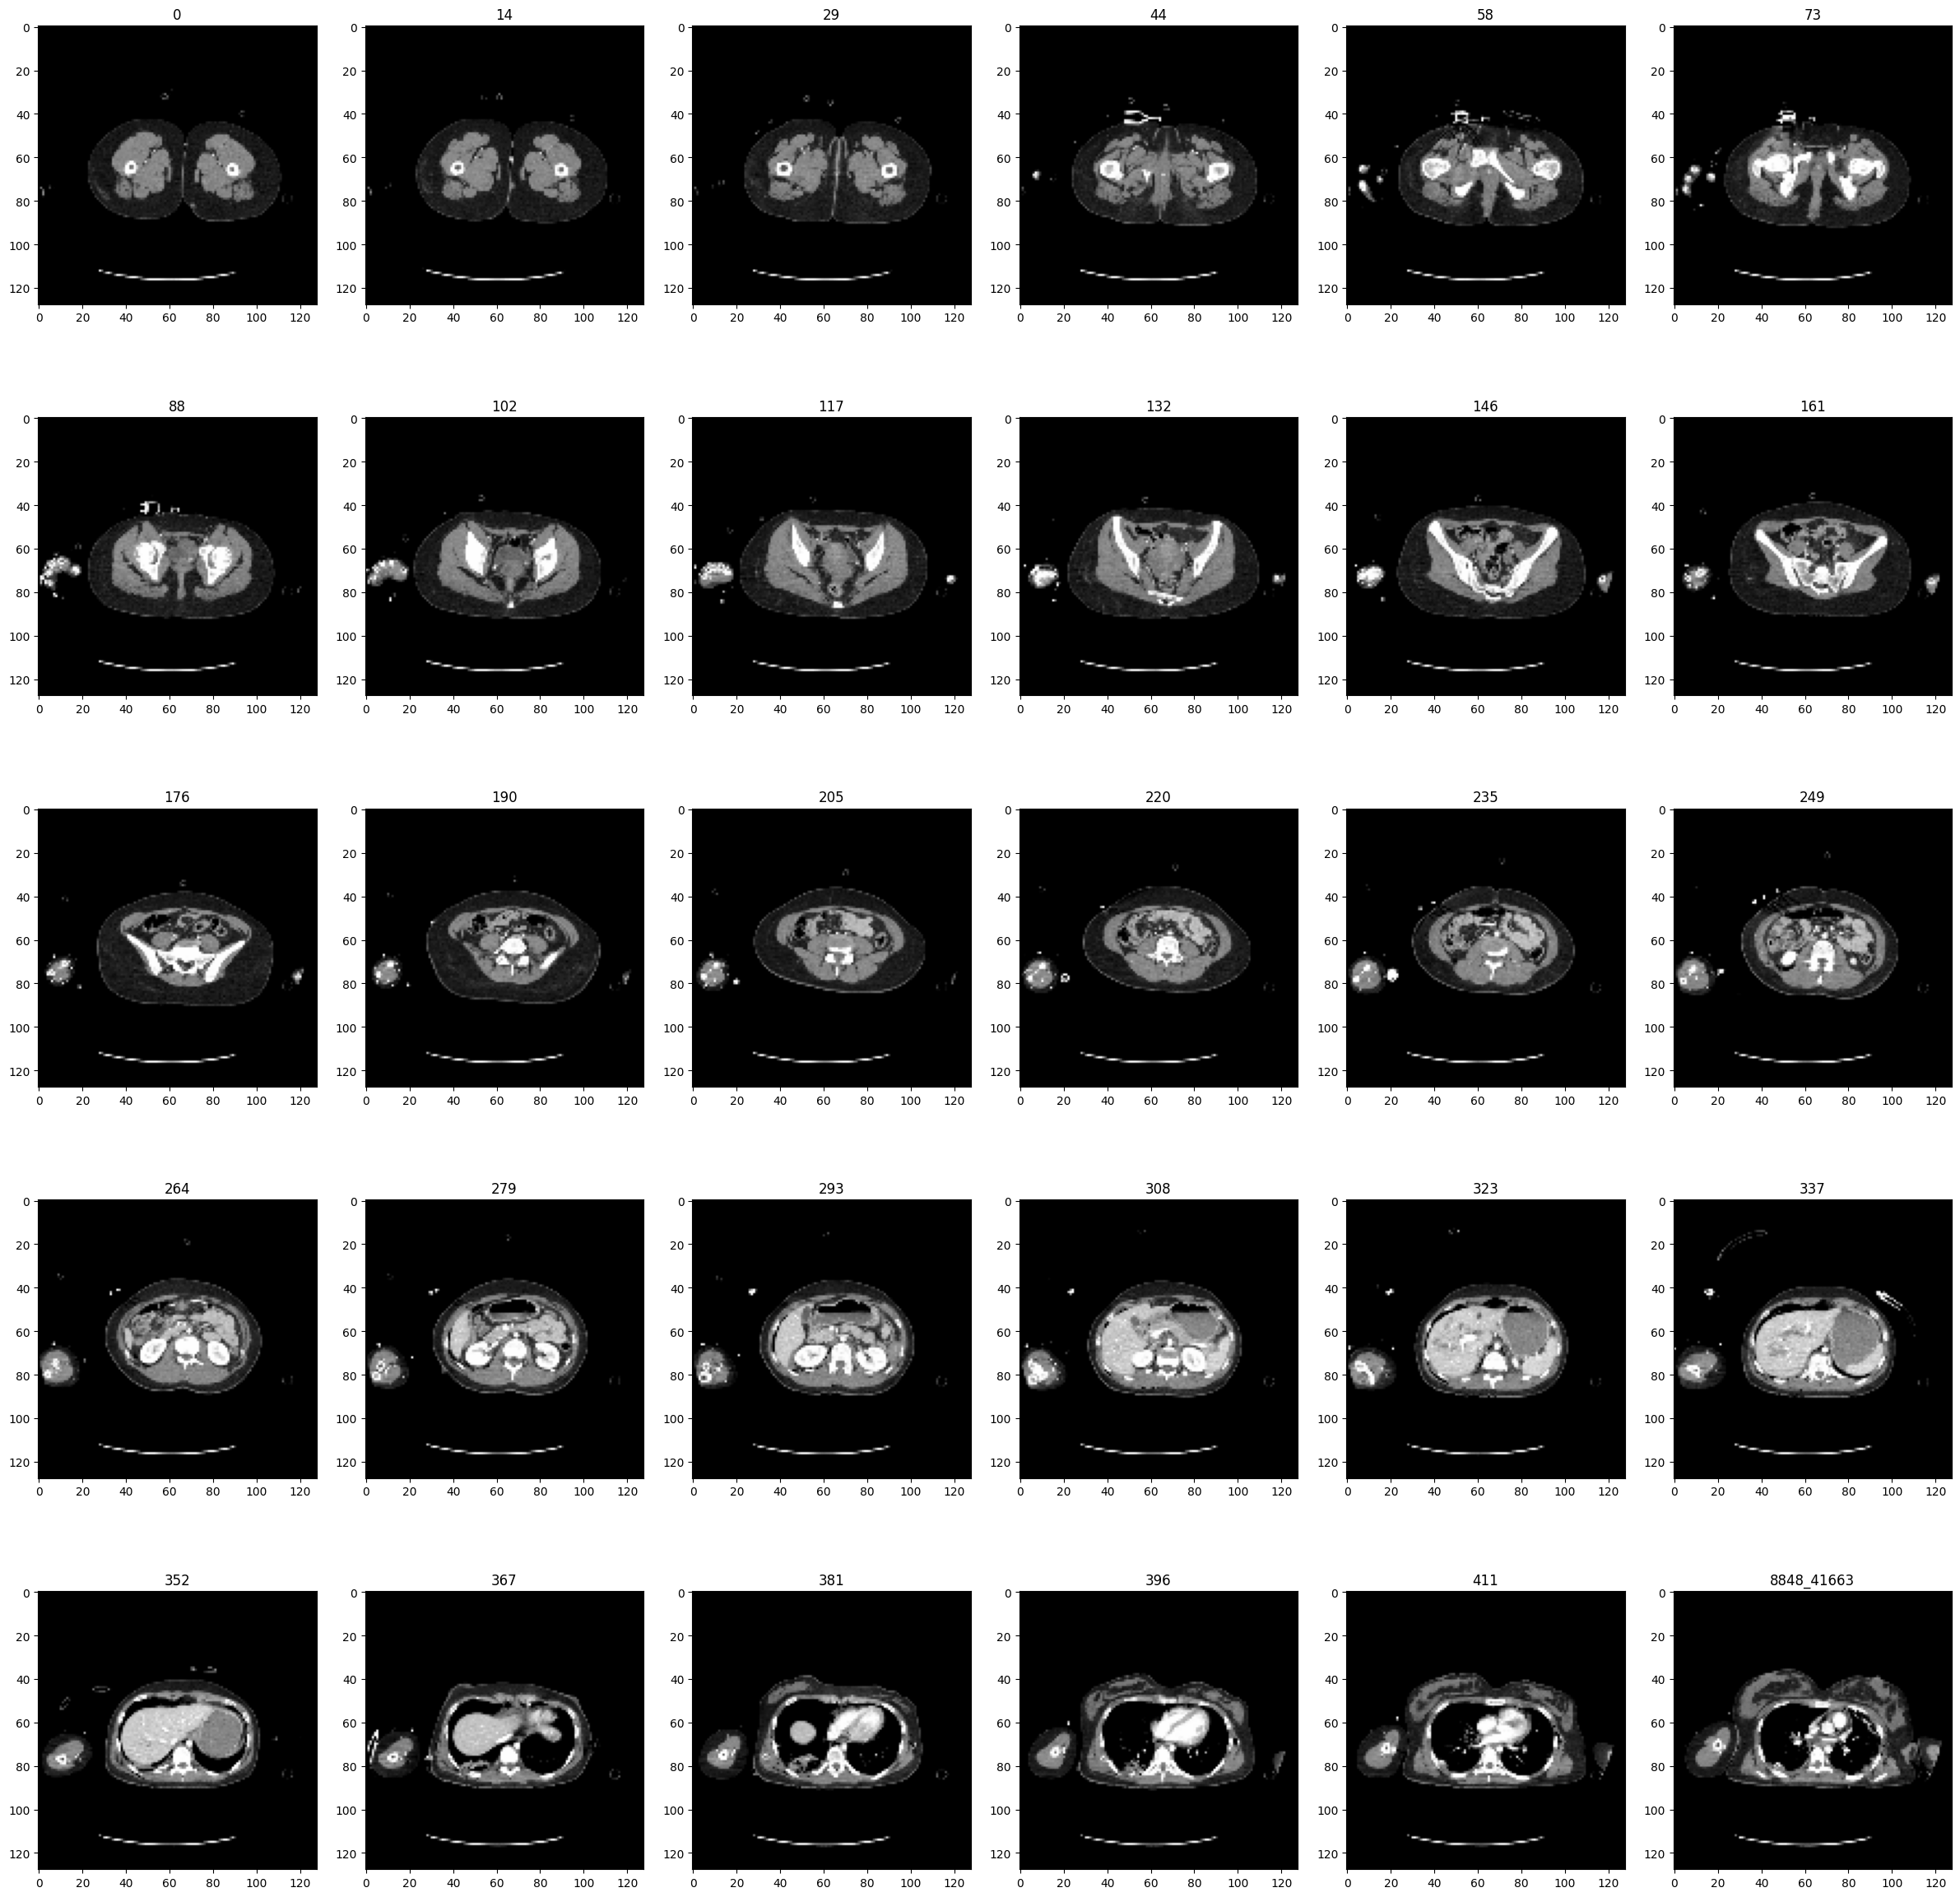

In [37]:
fig, axes = plt.subplots(5,6,figsize=(24,24))
for i, idx in enumerate(sample_indexes):
    file = sample_lst[idx]
    image = cv2.resize(cv2.imread(file), (128,128), cv2.INTER_LINEAR)
    axes[i//6][i%6].imshow(image)
    axes[i//6][i%6].set_title(f"{idx}")
plt.title(f"{_id}")
plt.tight_layout();

In [38]:
fig.savefig(f"{_id}.png", dpi=100)
fig.clear()
plt.close(fig)
del fig
gc.collect()

5925